#### Importing necessary libraries


In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df=pd.read_csv('../data/raw_data.csv') 

In [30]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


#### Checking Null values

In [31]:
df.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [32]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [33]:
df['User Behavior Class'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [34]:
df['Operating System'].unique()

array(['Android', 'iOS'], dtype=object)

#### Encoding Categorical Columns

In [35]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1}).astype(int)


C:\Users\Acer\AppData\Local\Temp\ipykernel_69020\2155605997.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1}).astype(int)


In [36]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,0,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,1,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,0,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,0,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,1,3


In [37]:
df['Operating System'] = df['Operating System'].replace({'Android': 0, 'iOS': 1}).astype(int)


C:\Users\Acer\AppData\Local\Temp\ipykernel_69020\436962866.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Operating System'] = df['Operating System'].replace({'Android': 0, 'iOS': 1}).astype(int)


In [38]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,0,393,6.4,1872,67,1122,40,0,4
1,2,OnePlus 9,0,268,4.7,1331,42,944,47,1,3
2,3,Xiaomi Mi 11,0,154,4.0,761,32,322,42,0,2
3,4,Google Pixel 5,0,239,4.8,1676,56,871,20,0,3
4,5,iPhone 12,1,187,4.3,1367,58,988,31,1,3


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    int32  
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    int32  
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int32(2), int64(7), object(1)
memory usage: 54.8+ KB


### Boxplot to visualize outliers

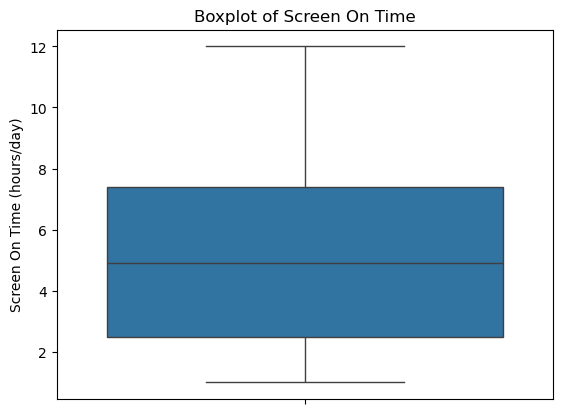

In [40]:


sns.boxplot(y=df["Screen On Time (hours/day)"])
plt.title("Boxplot of Screen On Time")
plt.show()

#### Removing outliers using IQR method

In [41]:
# Remove outliers using IQR method
Q1 = df["Screen On Time (hours/day)"].quantile(0.25)
Q3 = df["Screen On Time (hours/day)"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove extreme values
df = df[(df["Screen On Time (hours/day)"] >= lower_bound) & (df["Screen On Time (hours/day)"] <= upper_bound)]


In [42]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

#### Saving max and min values for later use

In [14]:
import json
# Get min and max values for each column
min_max_values = {
    column: {"min": df[column].min(), "max": df[column].max()}
    for column in df.columns
}

# Print the dictionary
print(min_max_values)

# Save to a JSON file for future use
with open('C:/Users/Acer/Desktop/Data Science Project/data/min_max_values.json', 'w') as f:
    json.dump(min_max_values, f)

print("Min-Max values saved successfully!")

{'User ID': {'min': 1, 'max': 700}, 'Device Model': {'min': 'Google Pixel 5', 'max': 'iPhone 12'}, 'Operating System': {'min': 0, 'max': 1}, 'App Usage Time (min/day)': {'min': 30, 'max': 598}, 'Screen On Time (hours/day)': {'min': 1.0, 'max': 12.0}, 'Battery Drain (mAh/day)': {'min': 302, 'max': 2993}, 'Number of Apps Installed': {'min': 10, 'max': 99}, 'Data Usage (MB/day)': {'min': 102, 'max': 2497}, 'Age': {'min': 18, 'max': 59}, 'Gender': {'min': 0, 'max': 1}, 'User Behavior Class': {'min': 1, 'max': 5}}
Min-Max values saved successfully!


In [43]:
df.to_csv('../data/preprocessed_data.csv', index=False)

#### Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Screen On Time (hours/day)","Battery Drain (mAh/day)", "App Usage Time (min/day)" , "Data Usage (MB/day)" ]] = scaler.fit_transform(df[["Screen On Time (hours/day)","Battery Drain (mAh/day)","App Usage Time (min/day)","Data Usage (MB/day)"]])

df.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,0,0.639085,0.490909,0.583426,67,0.425887,40,0,4
1,2,OnePlus 9,0,0.419014,0.336364,0.382386,42,0.351566,47,1,3
2,3,Xiaomi Mi 11,0,0.218310,0.272727,0.170569,32,0.091858,42,0,2
3,4,Google Pixel 5,0,0.367958,0.345455,0.510591,56,0.321086,20,0,3
4,5,iPhone 12,1,0.276408,0.300000,0.395764,58,0.369937,31,1,3


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    int32  
 3   App Usage Time (min/day)    700 non-null    float64
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    float64
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    float64
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    int32  
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(4), int32(2), int64(4), object(1)
memory usage: 54.8+ KB


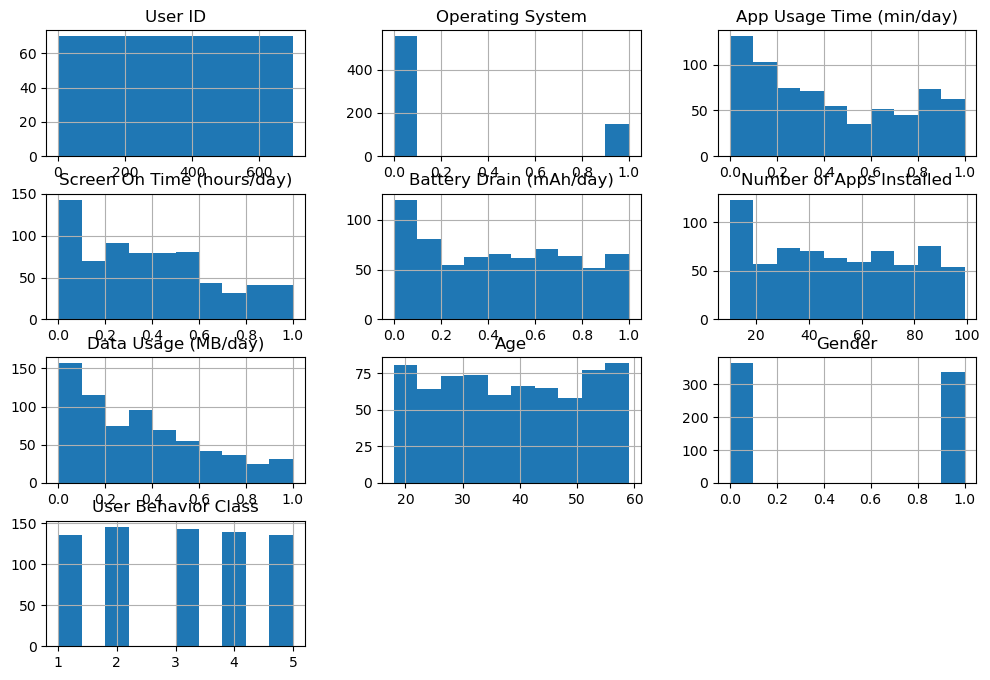

In [20]:
df.hist(figsize=(12,8))  # Histograms for numerical data
plt.show()


#### Saving data

In [46]:
df.to_csv('../data/scaled_data.csv', index=False)
